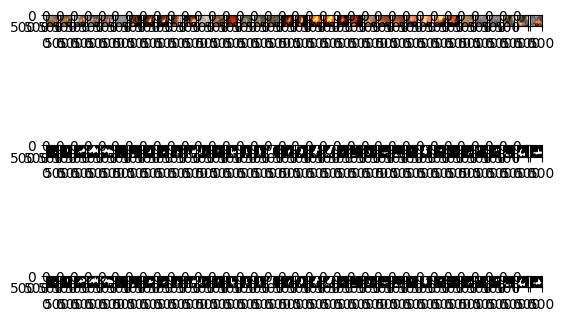

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

from carvana_dataset import CarvanaDataset
from unet import UNet

def pred_show_image_grid(data_path, model_pth, device, save_path):
    model = UNet(in_channels=3, num_classes=1).to(device)
    model.load_state_dict(torch.load(model_pth, map_location=torch.device(device)))
    image_dataset = CarvanaDataset(data_path, test=True)
    images = []
    orig_masks = []
    pred_masks = []

    for img, orig_mask in image_dataset:
        img = img.float().to(device)
        img = img.unsqueeze(0)

        pred_mask = model(img)

        img = img.squeeze(0).cpu().detach()
        img = img.permute(1, 2, 0)

        pred_mask = pred_mask.squeeze(0).cpu().detach()
        pred_mask = pred_mask.permute(1, 2, 0)
        pred_mask[pred_mask < 0]=0
        pred_mask[pred_mask > 0]=1

        orig_mask = orig_mask.cpu().detach()
        orig_mask = orig_mask.permute(1, 2, 0)

        images.append(img)
        orig_masks.append(orig_mask)
        pred_masks.append(pred_mask)

    images.extend(orig_masks)
    images.extend(pred_masks)
    fig = plt.figure()
    for i in range(1, 3*len(image_dataset)+1):
       fig.add_subplot(3, len(image_dataset), i)
       plt.imshow(images[i-1], cmap="gray")
    plt.savefig(save_path, dpi=600)
    plt.show()


if __name__ == "__main__":
    #SINGLE_IMG_PATH = "./data/manual_test/03a857ce842d_15.jpg"
    DATA_PATH = r"D:\\DATA\\CNNs\\Data\\UNET\\Wildfire\\Data"
    MODEL_PATH = r"D:\\DATA\\CNNs\\Data\\UNET\\models\\unet_wildfire.pth"
    SAVE_PATH = r"D:\\DATA\\CNNs\\Data\\UNET\\Wildfire\\Unet_plot36.png"

    device = "cuda" if torch.cuda.is_available() else "cpu"
    pred_show_image_grid(DATA_PATH, MODEL_PATH, device, SAVE_PATH)
    #single_image_inference(SINGLE_IMG_PATH, MODEL_PATH, device)